data size: 200


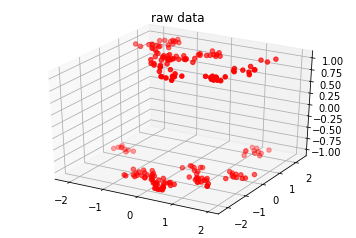

In [2]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from numpy import where



# Helper functions
def mdot(*args):
    """Multi argument dot function. http://wiki.scipy.org/Cookbook/MultiDot"""
    return reduce(np.dot, args)


def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])


def grid2d(start, end, num=50):
  """Create an 2D array where each row is a 2D coordinate.
  np.meshgrid is pretty annoying!
  """
  dom = np.linspace(start, end, num)
  X0, X1 = np.meshgrid(dom, dom)
  return np.column_stack([X0.flatten(), X1.flatten()])

# load the data
data = np.loadtxt("data2Class_adjusted.txt")
# split into features and labels
X, y = data[:, :3], data[:, 3]
print("data size:", y.size)
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")  # the projection arg is important!
ax.scatter(X[:, 1], X[:, 2], y, color="red")
ax.set_title("raw data")
plt.draw()  # show, use plt.show() for blocking

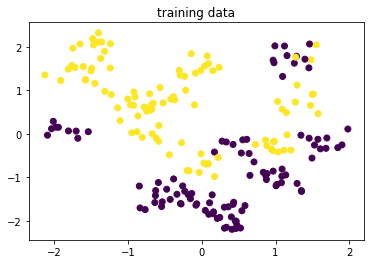

In [4]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X[:, 1],  X[:, 2],c=y)  # also show the real data
ax.set_title("training data")
plt.show()

In [363]:

def forward(x,w):
    return np.dot(w,x)

def backward(grad,x,w):
    return np.dot(grad,w)*((x*(1-x)).T)

def l(f,y):
    return max(0,1-f*y)

def sigma(x):
    return 1/(1+np.exp(-x))


In [380]:
h=np.zeros((100,))
Wxh=np.random.uniform(-1,1,(h.shape[0],3))
Whf=np.random.uniform(-1,1,(h.shape[0]))
f=0
oldloss=1000
loss=99
iteration=0
while np.abs(oldloss-loss)>0.001:
    oldloss=loss
    loss=0
    gradWhf=0
    gradWxh=0
    for i in range (X.shape[0]):
        h=forward(sigma(X[i]),Wxh)
        f=forward(sigma(h),Whf)
        loss+=l(f,y[i])
        gradlf=-y[i]*int((1-f*y[i])>0)
        gradlh=backward(gradlf,sigma(h),Whf)
        gradlx=backward(gradlh,sigma(X[i]),Wxh)
        gradWhf+=gradlf*sigma(h)
        gradWxh+=np.dot(gradlh.reshape(100,1),sigma(X[i]).reshape(1,3))
    Whf-=0.05*gradWhf
    Wxh-=0.05*gradWxh
    print(loss)
    iteration+=1
print(iteration)

305.64067745886103
13824.026677792526
171.83101747334254
173.7625747467933
280.4827466370612
279.758519354372
172.77132690889314
156.78812110042864
163.19890052208166
165.47139856520192
153.68724918065445
165.85443726624277
151.3847246703699
159.2442808512383
144.38254411363124
150.73805424137987
136.70842930164082
143.63046178577093
124.676124734713
133.51691530999366
103.35582620905294
104.3892727669351
102.02277625317045
101.54446190035151
99.29115646140657
96.8990687563585
96.35517287200129
95.9249296676678
95.54947604960137
95.36739493491022
96.15383128589536
96.47458977956994
99.46810081438626
100.09167639143895
101.65554489988953
100.45192684676861
100.24420796770016
97.91955802044306
97.8735732433493
96.25986747672809
95.71133942583434
95.31500490772602
95.0231199002083
94.83626832066341
94.7041808732508
94.68894494072525
95.06834461058628
96.11255866519754
98.90540253220047
98.12965983846298
100.5654371861041
100.71841574623882
101.18207615294561
99.65706772375697
99.833945713

68.0902500360277
67.19747842392617
64.87657436989703
67.00491891072808
66.41690586545819
69.15308257509973
69.68236391845353
66.82280267103407
65.03079355674036
67.49969429259212
66.37828642963046
67.62808970678087
63.30680706788868
66.97296740262487
64.93654269753804
67.09154209951545
64.07545853066611
66.98999911320287
64.5425632910427
66.60782966068665
62.64838277205801
64.33062893719718
62.96960846226599
64.87634000057372
63.61222873248054
67.95371746387515
68.11584260751579
66.15220449931125
62.48414750424686
64.38651397161775
62.699648258260915
64.40202896406626
62.08013855240958
64.43889880249183
61.89856756668627
64.46180205763123
61.72751963112541
64.47694193074643
62.19969931072061
64.50754588219478
62.026417282408744
66.11837054586044
62.174417596806286
66.40781946764241
61.72983052686675
64.44736453724923
61.593622456442304
65.15528646506877
61.40247841813897
64.5357499366111
61.0939685797306
64.68113760896678
61.00697983791408
63.25386437726995
61.220190614277975
65.391997

54.08221552733445
55.51637435718831
53.51158168225251
53.6851721506358
53.65336537622578
54.06737881422428
53.813826389620075
53.8611689996899
53.42449196869862
53.72517245427134
53.276148203009
53.24748218611151
53.25039600838035
53.46423121807607
53.396156441976544
53.64780460430912
53.51849436388414
54.10812869130809
54.03295685968847
54.66281396274471
53.5307857976554
54.006748155815764
53.68765726848159
54.130980053684155
53.548746956477075
53.929067274381765
53.69628915727793
54.066992339687296
53.54252163836455
53.51642628999564
53.1813722585123
53.084457652357784
53.1595261813448
53.74679637795483
53.36956852685471
53.597974310355724
53.466440919184215
53.789075483471045
53.68563948567746
53.95568533277027
53.50476858635502
54.127842385419534
53.64015829659254
54.667433282326094
53.25807876653059
53.13160937479507
53.31615403476621
53.532027796580856
53.39955766034425
53.70624947458528
53.62061054181084
53.896649889395796
53.417933757614655
54.09056249892694
53.537018217454076


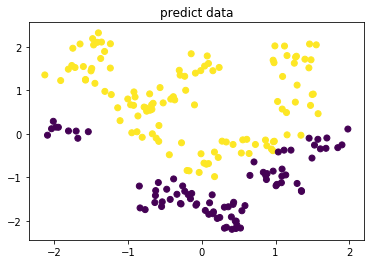

In [381]:
F=np.zeros((200,))
for i in range (X.shape[0]):
        h=forward(sigma(X[i]),Wxh)
        F[i]=forward(sigma(h),Whf)
        
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111)  # the projection part is important
ax.scatter(X[:, 1],  X[:, 2],c=1*(sigma(F)>0.5))  # also show the real dat T

ax.set_title("predict data")
plt.show()

In [340]:
f

-0.722818993147179

In [31]:
-y[0]*int(1-f*y[0]>0)

0.0

In [37]:
grad2=backward(0,h,W2)
grad2

array([-0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,
       -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.])

In [40]:
grad1=backward(grad2,X[0],W1)
grad1

array([ 0., -0., -0.])

In [43]:
sigma(X[0])

array([0.73105858, 0.78465454, 0.24268775])

In [358]:
gradlf

-1.0

In [259]:
y[4]

-1.0